In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import numpy as np


import warnings

warnings.filterwarnings('ignore')

In [35]:

PATH_IMAGENS = '../dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Negativo/'

In [83]:
import pandas as pd
import os
from plots import funcaoPlot


IMG_ALTURA_=128
IMG_LARGURA_=128
IMG_CANAIS_=3
IMG_PASSO_INICIAL_ = IMG_LARGURA_ // 4

IMG_ALTURA = IMG_ALTURA_
IMG_LARGURA = IMG_LARGURA_
IMG_CANAIS = IMG_CANAIS_
IMG_PASSO_INICIAL = IMG_PASSO_INICIAL_

imagens_ids = sorted(next(os.walk(PATH_IMAGENS))[2])
print("Total de Imagens: ", len(imagens_ids))

dataset = pd.DataFrame(columns=['img', 'img_id'])


Total de Imagens:  72


In [175]:
def zero(imagem, filtro):
    linha = imagem.shape[0] + ((filtro.shape[0] - 1) // 2) * 2
    coluna = imagem.shape[1] + ((filtro.shape[1] - 1) // 2) * 2
    new_shape = (linha, coluna)

    imagem_zero = np.zeros(new_shape)

    row_start = (new_shape[0] - imagem.shape[0]) // 2
    row_end = row_start + imagem.shape[0]
    col_start = (new_shape[1] - imagem.shape[1]) // 2
    col_end = col_start + imagem.shape[1]

    imagem_zero[row_start:row_end, col_start:col_end] = imagem
    return np.uint8(imagem_zero)

def recorta(imagem, filtro):
    
    recortes = []    
    
    for linha in range(0, imagem.shape[0], filtro.shape[0]):
        for coluna in range(0, imagem.shape[1], filtro.shape[1]):
            recortes.append(imagem[linha:linha + filtro.shape[0] -1, coluna:coluna + filtro.shape[1]] -1)   
            
    
    return recortes
        
        
    


In [186]:
def zero_pad(imagem, altura_corte, largura_corte):
    # Altura e largura originais da imagem
    altura_original, largura_original = imagem.shape[:2]

    # Calcula o número necessário de recortes em cada dimensão
    num_cortes_vertical = -(-altura_original // altura_corte)   # Arredonda para cima
    num_cortes_horizontal = -(-largura_original // largura_corte)

    # Calcula o novo tamanho da imagem
    nova_altura = num_cortes_vertical * altura_corte
    nova_largura = num_cortes_horizontal * largura_corte

    # Cria uma nova imagem com o novo tamanho, preenchida com zeros
    imagem_zero = np.zeros((nova_altura, nova_largura, imagem.shape[2]), dtype=imagem.dtype)

    # Posição inicial para colocar a imagem original
    row_start = (nova_altura - altura_original) // 2
    col_start = (nova_largura - largura_original) // 2

    # Coloca a imagem original no centro da nova imagem
    imagem_zero[row_start:row_start+altura_original, col_start:col_start+largura_original, :] = imagem

    return imagem_zero

def recorta(imagem, altura_corte, largura_corte):
    recortes = []    
    # Itera sobre a imagem, considerando a altura e largura do corte
    for linha in range(0, imagem.shape[0] - altura_corte + 1, altura_corte):
        for coluna in range(0, imagem.shape[1] - largura_corte + 1, largura_corte):
            # Adiciona o corte à lista de recortes
            recorte = imagem[linha:linha + altura_corte, coluna:coluna + largura_corte, :]
            recortes.append(recorte)   
    return recortes




In [187]:
def zero(imagem, altura_corte, largura_corte):
    # Calcula o novo tamanho da imagem para ser múltiplo de 128
    nova_altura = ((imagem.shape[0] + altura_corte - 1) // altura_corte) * altura_corte
    nova_largura = ((imagem.shape[1] + largura_corte - 1) // largura_corte) * largura_corte

    # Cria uma nova imagem com o novo tamanho, preenchida com zeros
    imagem_zero = np.zeros((nova_altura, nova_largura, imagem.shape[2]), dtype=imagem.dtype)

    # Coloca a imagem original no começo da nova imagem
    imagem_zero[:imagem.shape[0], :imagem.shape[1], :] = imagem

    return imagem_zero


In [189]:
def zero(imagem, altura_corte, largura_corte):
    # Calcula o novo tamanho da imagem para ser múltiplo de 128
    nova_altura = ((imagem.shape[0] + altura_corte - 1) // altura_corte) * altura_corte
    nova_largura = ((imagem.shape[1] + largura_corte - 1) // largura_corte) * largura_corte

    # Cria uma nova imagem com o novo tamanho, preenchida com zeros
    imagem_zero = np.zeros((nova_altura, nova_largura, imagem.shape[2]), dtype=imagem.dtype)

    # Coloca a imagem original no começo da nova imagem
    imagem_zero[:imagem.shape[0], :imagem.shape[1], :] = imagem

    return imagem_zero


In [190]:
from skimage.io import imread

id_ = imagens_ids[0]
img = imread(PATH_IMAGENS + id_)

altura_corte, largura_corte = 128, 128
imagem_processada = zero(img, altura_corte, largura_corte)

recortes = recorta(imagem_processada, altura_corte, largura_corte)


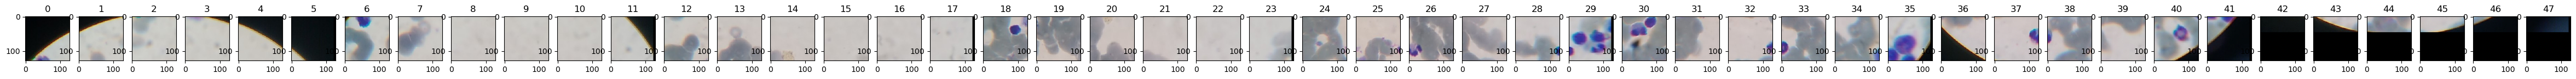

In [191]:
funcaoPlot(recortes)

In [192]:
len(recortes)

48

In [193]:
from skimage.io import imsave
import os
pasta_salvar = 'dataset/meanshift/predictions/negativo/novo'

if not os.path.exists(pasta_salvar):
    os.makedirs(pasta_salvar)

# Itera sobre os recortes e salva cada um
for i, recorte in enumerate(recortes):
    # Define o nome do arquivo para o recorte
    nome_arquivo = f"recorte_{i}.png"  # Você pode escolher outro formato como .jpg
    caminho_completo = os.path.join(pasta_salvar, nome_arquivo)
    
    # Salva o recorte
    imsave(caminho_completo, recorte)

/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1292181503.py:15: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_8.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1292181503.py:15: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_9.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1292181503.py:15: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_10.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1292181503.py:15: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_16.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1292181503.py:15: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte

In [ ]:
import warnings

# Suprime apenas os avisos de imagens de baixo contraste
warnings.filterwarnings('ignore', category=UserWarning, module='skimage.io._io')


In [195]:
from skimage.io import imread, imsave
from skimage import exposure
import warnings

# Suprime avisos de baixo contraste
warnings.filterwarnings('ignore', category=UserWarning, module='skimage.io._io')

# Loop através de todas as imagens
for img_id in imagens_ids:
    img = imread(os.path.join(PATH_IMAGENS, img_id))
    
    # Aplica a função de preenchimento com zeros
    imagem_processada = zero(img, IMG_ALTURA_, IMG_LARGURA_)

    # Obter recortes da imagem processada
    recortes = recorta(imagem_processada, IMG_ALTURA_, IMG_LARGURA_)

    # Salvar cada recorte
    for i, recorte in enumerate(recortes):
        nome_arquivo = f"recorte_{img_id}_{i}.png"
        caminho_completo = os.path.join("dataset/meanshift/predictions/negativo/novo", nome_arquivo)

        imsave(caminho_completo, recorte)


/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1709359247.py:23: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_CM200826-121430003.jpg_8.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1709359247.py:23: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_CM200826-121430003.jpg_9.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1709359247.py:23: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_CM200826-121430003.jpg_10.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipykernel_7642/1709359247.py:23: UserWarning: dataset/meanshift/predictions/negativo/novo/recorte_CM200826-121430003.jpg_16.png is a low contrast image
  imsave(caminho_completo, recorte)
/var/folders/d3/ntwcpgh53qlbqlb78_gzrlcc0000gn/T/ipyke

In [196]:
from skimage.io import imread_collection

collection = imread_collection('dataset/meanshift/predictions/negativo/novo/*.png')

In [199]:

import numpy as np

import warnings

warnings.filterwarnings('ignore')

Processando Mean Shift:   0%|          | 0/3518 [00:00<?, ?it/s]/Users/lucasbezerra26/Documents/mestrado/visao/repos/menshift-imagens/meanshift/meanshift.py:12: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  img_suavizada = gaussian(img, sigma=1)
/Users/lucasbezerra26/Documents/mestrado/visao/repos/menshift-imagens/meanshift/meanshift.py:12: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  img_suavizada = gaussian(img, sigma=1)
/Users/lucasbezerra26/Documents/mestrado/visao/repos/menshift-imagens/meanshift/meanshift.py:12: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicit

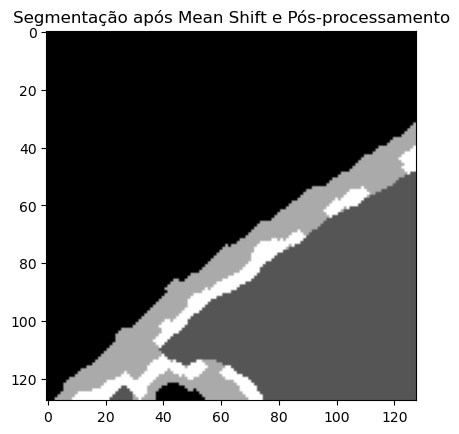

In [200]:

from matplotlib import pyplot as plt
from meanshift import aplicar_menshift_paralelo
from multiprocessing import Pool

pool = Pool(processes=200)
imagens_meanshift2 = aplicar_menshift_paralelo(collection)
pool.close()
pool.join()

# Exibição dos resultados
plt.figure()
plt.title('Segmentação após Mean Shift e Pós-processamento')
plt.imshow(imagens_meanshift2[0], cmap='gray')
plt.show()


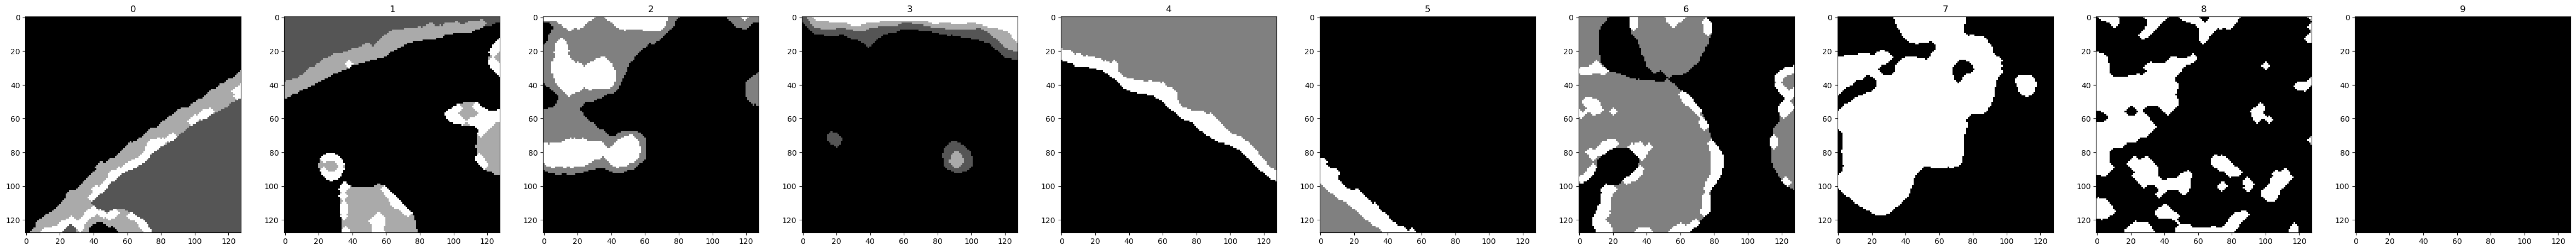

In [202]:
funcaoPlot(imagens_meanshift2[:10])

In [222]:
def converter_para_binario(mascara):
    return (mascara != 0).astype(int)

# Aplicando a conversão para cada máscara
mascaras_binarias = [converter_para_binario(mascara) for mascara in imagens_meanshift2]


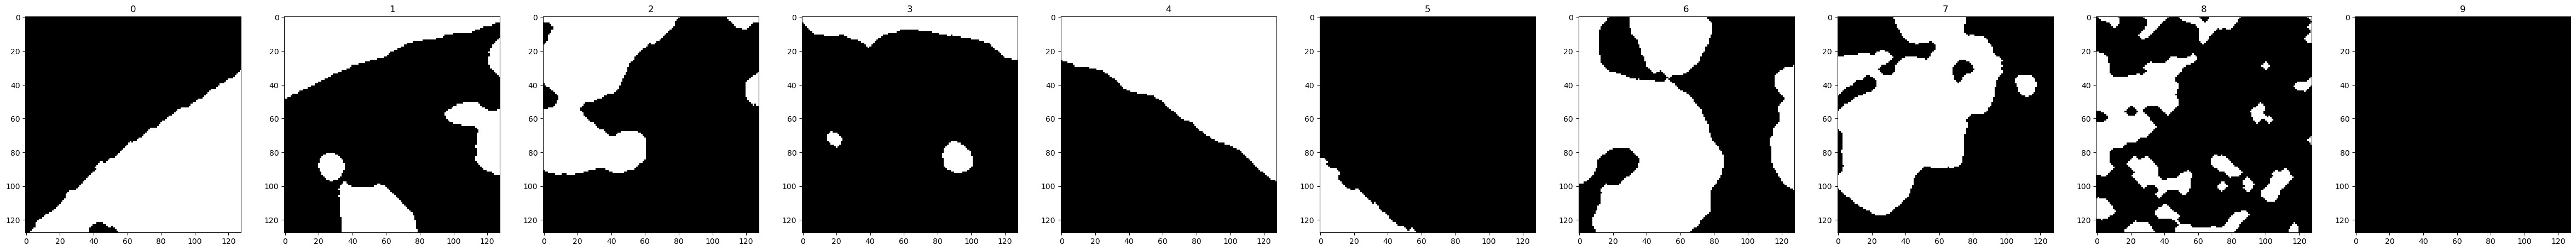

In [223]:
funcaoPlot(mascaras_binarias[:10])

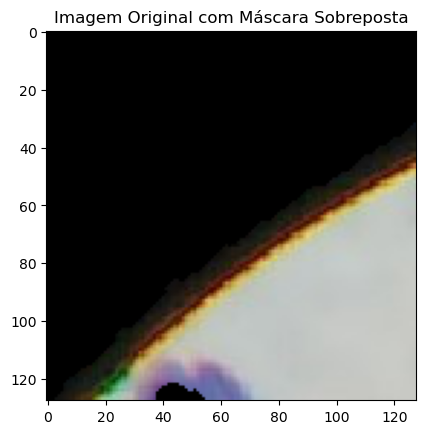

In [224]:
def sobrepor_imagem_com_mascara(imagem_original, mascara):
    # Assumindo que a máscara é binária (0 ou 1), e que 1 representa as áreas de interesse
    mascara_rgb = np.stack([mascara, mascara, mascara], axis=-1)  # Converte a máscara para 3 canais

    # Multiplica a imagem original pela máscara para manter os pixels originais onde a máscara é 1
    imagem_sobreposta = imagem_original * mascara_rgb

    # Se desejar converter os pixels fora da máscara para preto (opcional)
    imagem_sobreposta[mascara_rgb == 0] = 0

    return imagem_sobreposta

# Aplicar a sobreposição para cada par de imagem e máscara
imagens_sobrepostas = [sobrepor_imagem_com_mascara(orig, ms) for orig, ms in zip(collection, mascaras_binarias)]

# Exibir uma das imagens sobrepostas
plt.figure()
plt.title('Imagem Original com Máscara Sobreposta')
plt.imshow(imagens_sobrepostas[0])
plt.show()


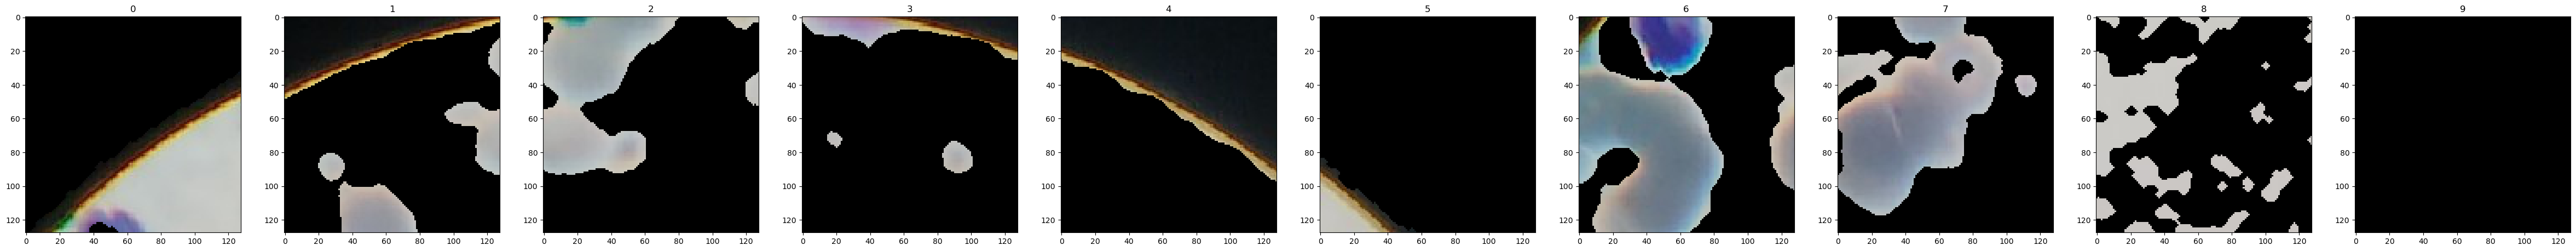

In [227]:
funcaoPlot(imagens_sobrepostas[:10])

In [229]:
from skimage import img_as_ubyte

pasta_salvar = 'dataset/meanshift/predictions/negativo/novo'

if not os.path.exists(pasta_salvar):
    os.makedirs(pasta_salvar)

for i, recorte in enumerate(imagens_sobrepostas):
    nome_arquivo = f"recorte_{i}_sobreposto.png"
    caminho_completo = os.path.join(pasta_salvar, nome_arquivo)

    # Converte a imagem para uint8 se não estiver nesse formato
    if recorte.dtype != np.uint8:
        recorte = img_as_ubyte(recorte)

    imsave(caminho_completo, recorte)


In [233]:
import os
from skimage.io import imread, imsave
from skimage import img_as_ubyte

path = 'dataset/meanshift/predictions/positivo/'
pasta_salvar = 'dataset/meanshift/predictions/positivo/novo/'

# Criar a pasta de destino se não existir
if not os.path.exists(pasta_salvar):
    os.makedirs(pasta_salvar)

# Lista todos os arquivos no diretório
arquivos = os.listdir(path)
imagens_originais = [f for f in arquivos if f.endswith('-orig.png')]
mascaras = [f for f in arquivos if f.rstrip('.png').isdigit()]

for img_orig in imagens_originais:
    base_nome = img_orig.replace('-orig.png', '')
    mascara_correspondente = next((m for m in mascaras if m.startswith(base_nome)), None)

    if mascara_correspondente:
        # Ler a imagem original e a máscara
        imagem = imread(os.path.join(path, img_orig))
        mascara = imread(os.path.join(path, mascara_correspondente))

        # Converter a máscara para binário
        mascara_binaria = (mascara != 0).astype(int)
        # Se a imagem original tem 4 canais, ajustar a máscara para também ter 4 canais
        if imagem.shape[2] == 4:
            mascara_binaria = np.stack([mascara_binaria, mascara_binaria, mascara_binaria, np.ones_like(mascara_binaria)], axis=-1)
        else: # Se não, ajustar para 3 canais
            mascara_binaria = np.stack([mascara_binaria, mascara_binaria, mascara_binaria], axis=-1)

        # Aplicar a sobreposição
        imagem_sobreposta = imagem * np.stack([mascara_binaria, mascara_binaria, mascara_binaria], axis=-1)

        # Salvar a imagem sobreposta
        nome_arquivo_sobreposto = f"{base_nome}_sobreposto.png"
        caminho_completo_sobreposto = os.path.join(pasta_salvar, nome_arquivo_sobreposto)
        imsave(caminho_completo_sobreposto, img_as_ubyte(imagem_sobreposta))


ValueError: operands could not be broadcast together with shapes (128,128,4) (128,128,4,4,3) 

TypeError: Image data of dtype <U14 cannot be converted to float

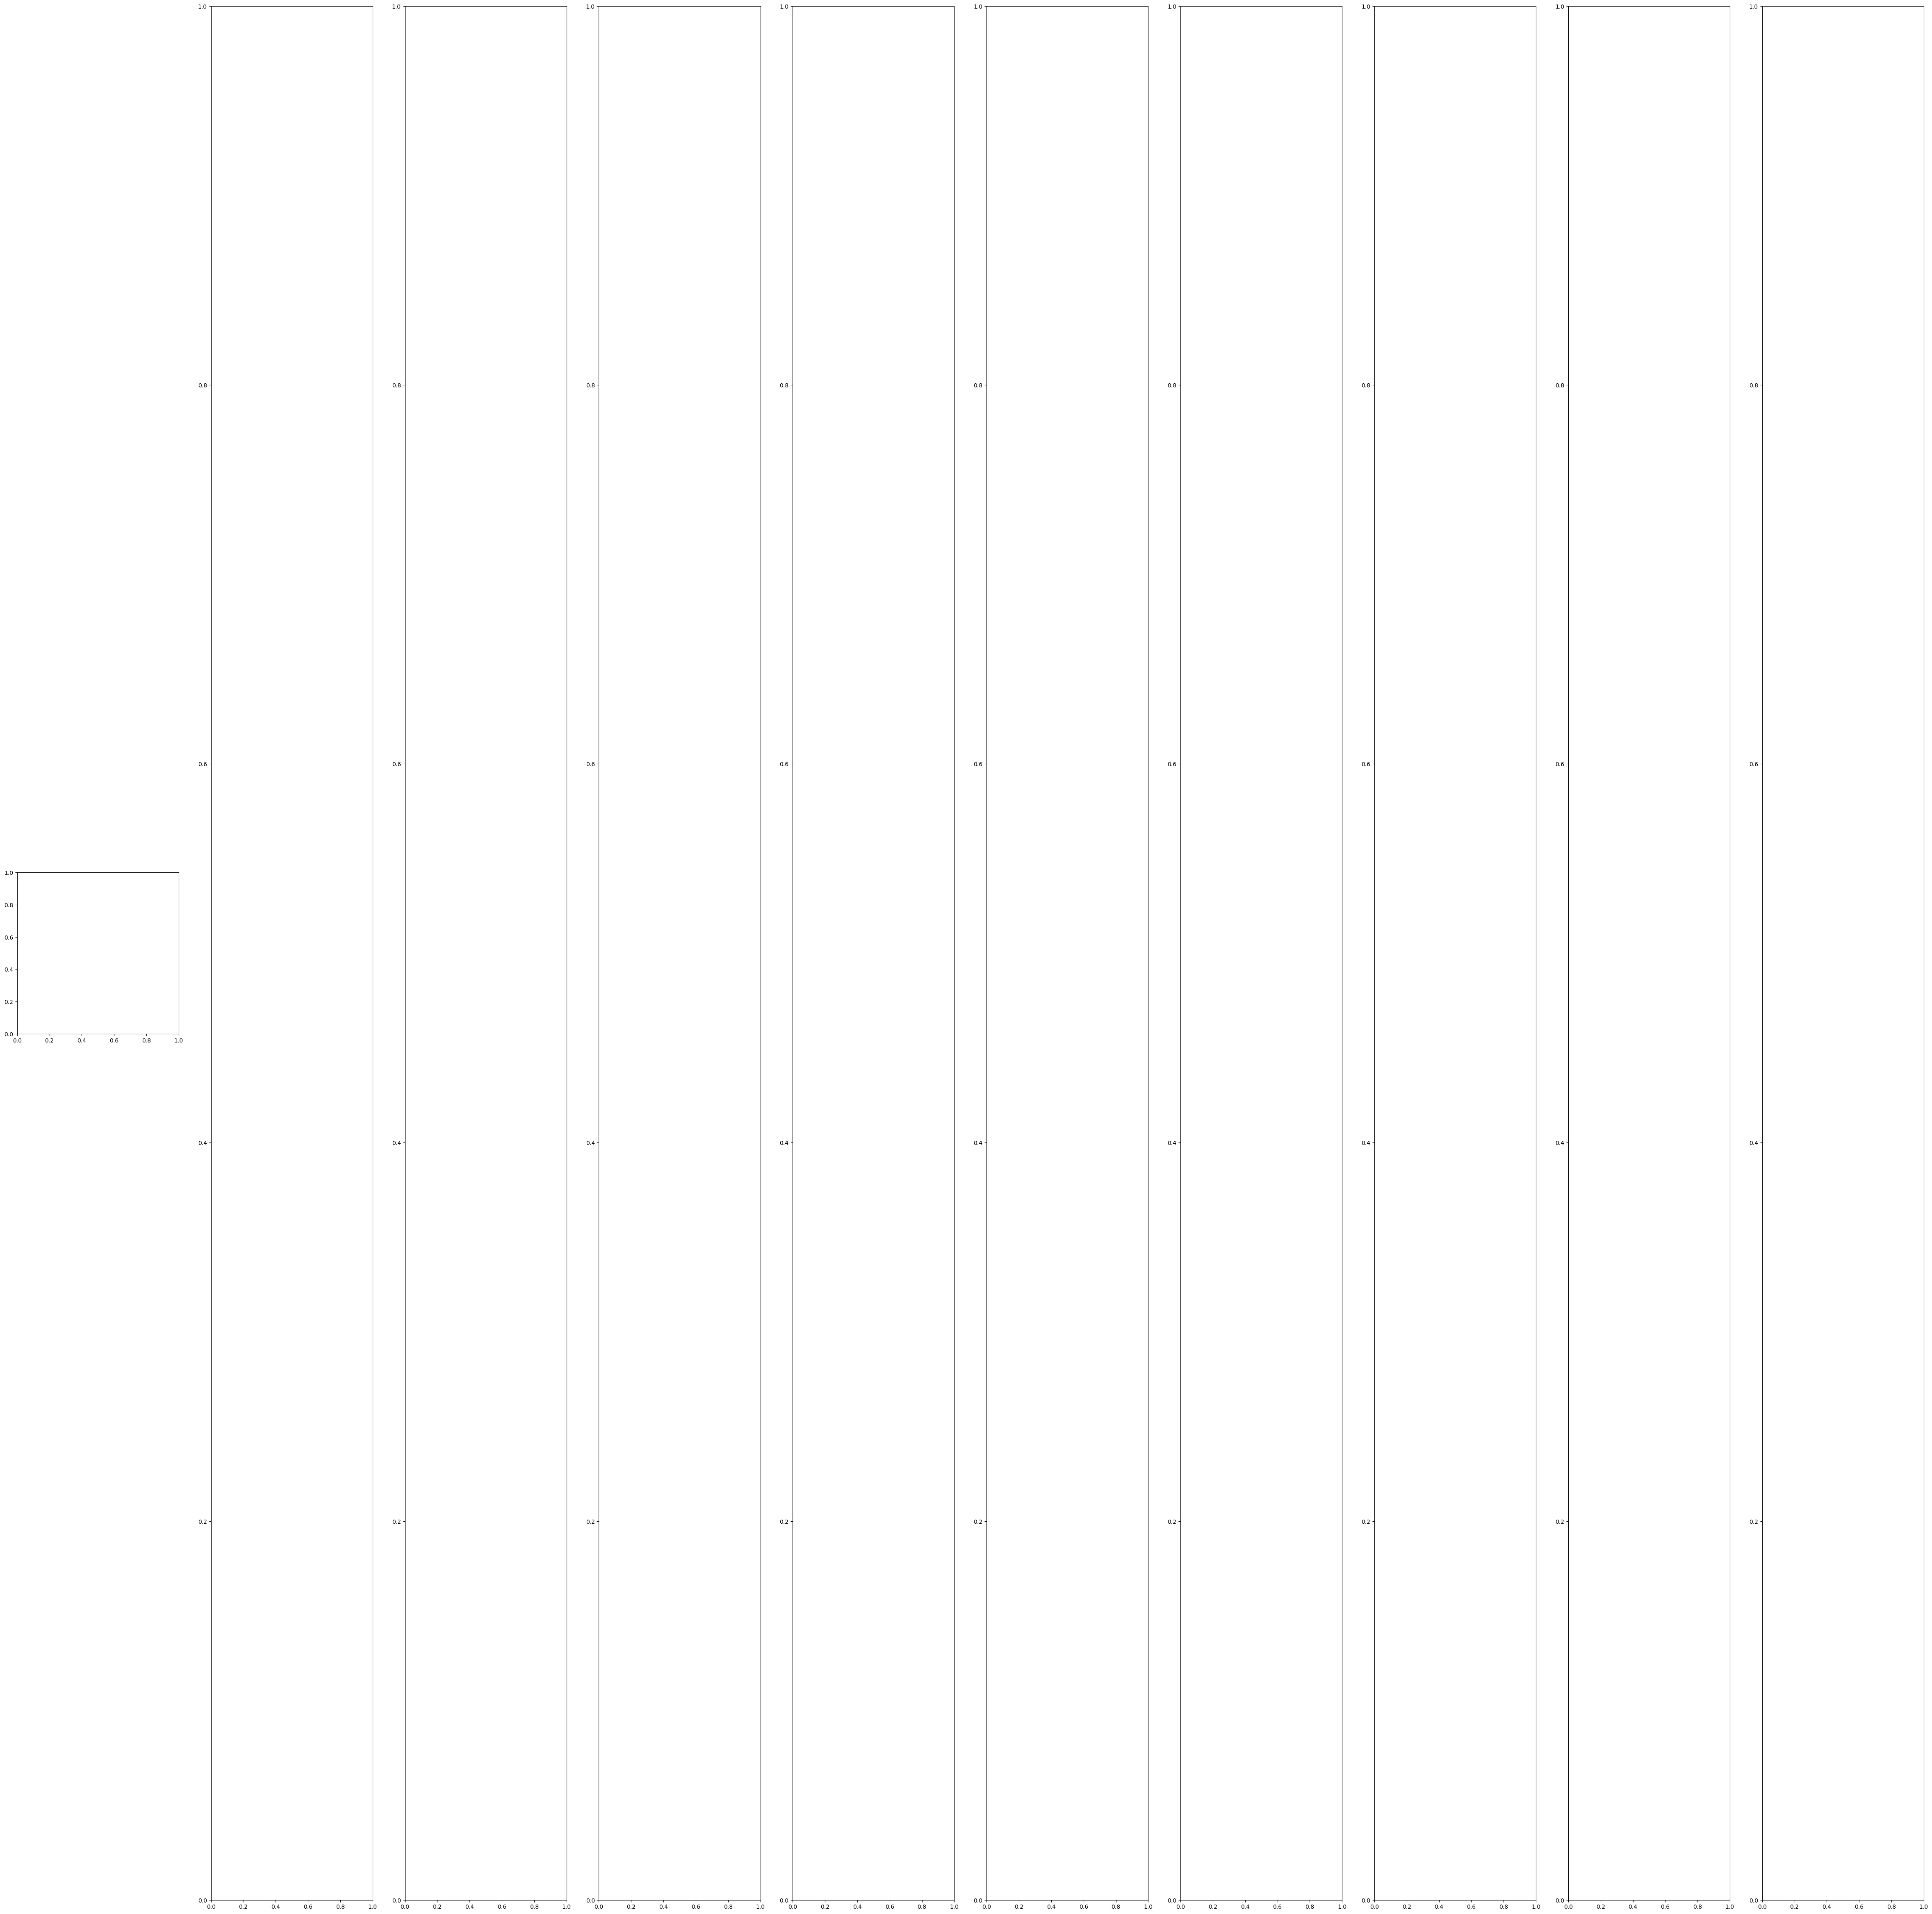

In [231]:
funcaoPlot(imagens_originais[:10])